In [269]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import re

%matplotlib inline

1 - Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [270]:
years = (1900, 2001)
names_count = []
for year in range(*years):
    path = 'names/yob' + str(year) + '.txt'
    name_list = pd.read_csv(path, names=['Name','Gender','Count'])
    
    ruth = name_list[name_list.Name == 'Ruth'].Count.sum()
    robert = name_list[name_list.Name == 'Robert'].Count.sum()
    names_count.append([ruth, robert])

df = pd.DataFrame(names_count, columns=['Ruth', 'Robert'], index=[str(i) for i in range(*years)])

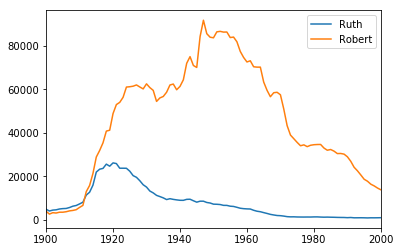

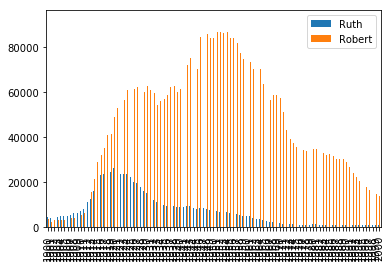

In [271]:
df.plot()
df.plot.bar()

2 - Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15fb153c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15fcdf1d0>]], dtype=object)

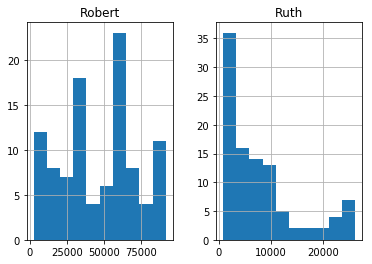

In [272]:
df.hist()

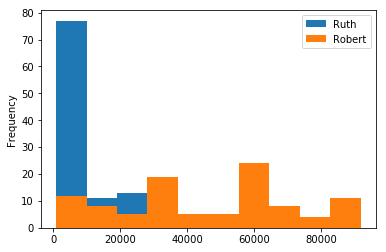

In [273]:
df.plot.hist()

3 - Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [274]:
year = 1950
df = pd.read_csv('names/yob' + str(year) + '.txt', names=['Name', 'Gender', 'Count'])

df = df[df.Name.str.startswith('R')].groupby('Name').sum().sort_values(by='Count', axis=0, ascending=False).head(10)

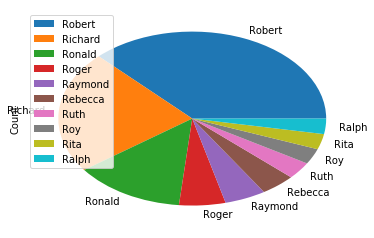

In [275]:
df.plot.pie(y='Count')

4 - Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [276]:
years = (1900, 2000)

birth_list_temp = []

for year in range(*years):
    name_list = pd.read_csv('names/yob' + str(year) + '.txt', names=['Name', 'Gender', 'Count'])
    birth_list_temp.append(name_list)

In [277]:
birth_list = birth_list_temp[0]
i = 0

for birth in birth_list_temp[1:]:
    birth_list = pd.merge(birth_list, birth, on=['Name', 'Gender'], how='outer', suffixes=('x' + str(i), 'y' + str(i)))
    i += 1

birth_list = birth_list.fillna(0)

In [278]:
count_list = [col for col in list(birth_list) if 'Count' in col]

birth_list['Total'] = list(map(int, birth_list[count_list[0]]))

for count in count_list[1:]:
    birth_list['Total'] += list(map(int, birth_list[count]))
    
birth_list = birth_list[['Name', 'Total']].sort_values(by='Total', axis=0, ascending=False)

def consonants(name):
    c = re.findall('[bcdfghjklmnpqrstvwxyz]', name.lower())
    return len(c)

birth_list['Consonants'] = list(map(consonants, birth_list.Name))

len_df = birth_list.groupby('Consonants').agg('sum').Total.to_frame()

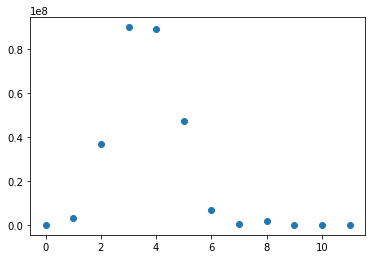

In [279]:
plt.scatter(list(len_df.index.values), list(len_df.Total) )